In [1]:
# Импорт необходимых библиотек для анализа данных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# Устанавливаем стиль darkgrid
sns.set_style('darkgrid')

In [4]:
# Импорт файла products и просмотр данных
products = pd.read_excel(r'C:\Users\schep\Projects\products.xlsx')

In [5]:
products.head()

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


In [6]:
# Импорт файла orders и просмотр данных
orders = pd.read_excel(r'C:\Users\schep\Projects\orders.xlsx')

In [7]:
orders.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [8]:
# Объединяем таблицы
merged_df = pd.merge(products, orders, on = 'product_id')

In [9]:
merged_df.head()

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14
2,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517368853,2022-01-13 09:34:18,1,18,18,14
3,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517676281,2022-01-13 08:21:53,2,18,18,14
4,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517600286,2022-01-13 14:32:24,4,18,18,14


**1. Наиболее продаваемая категория товаров**

In [10]:
# Группируем товары по категориям и считаем сумму проданных позиций, сгруппированных по убыванию:
grouped_by_level1 = (merged_df.groupby('level1')['quantity']).sum().reset_index().sort_values('quantity', ascending = False)
grouped_by_level1.head()   

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239


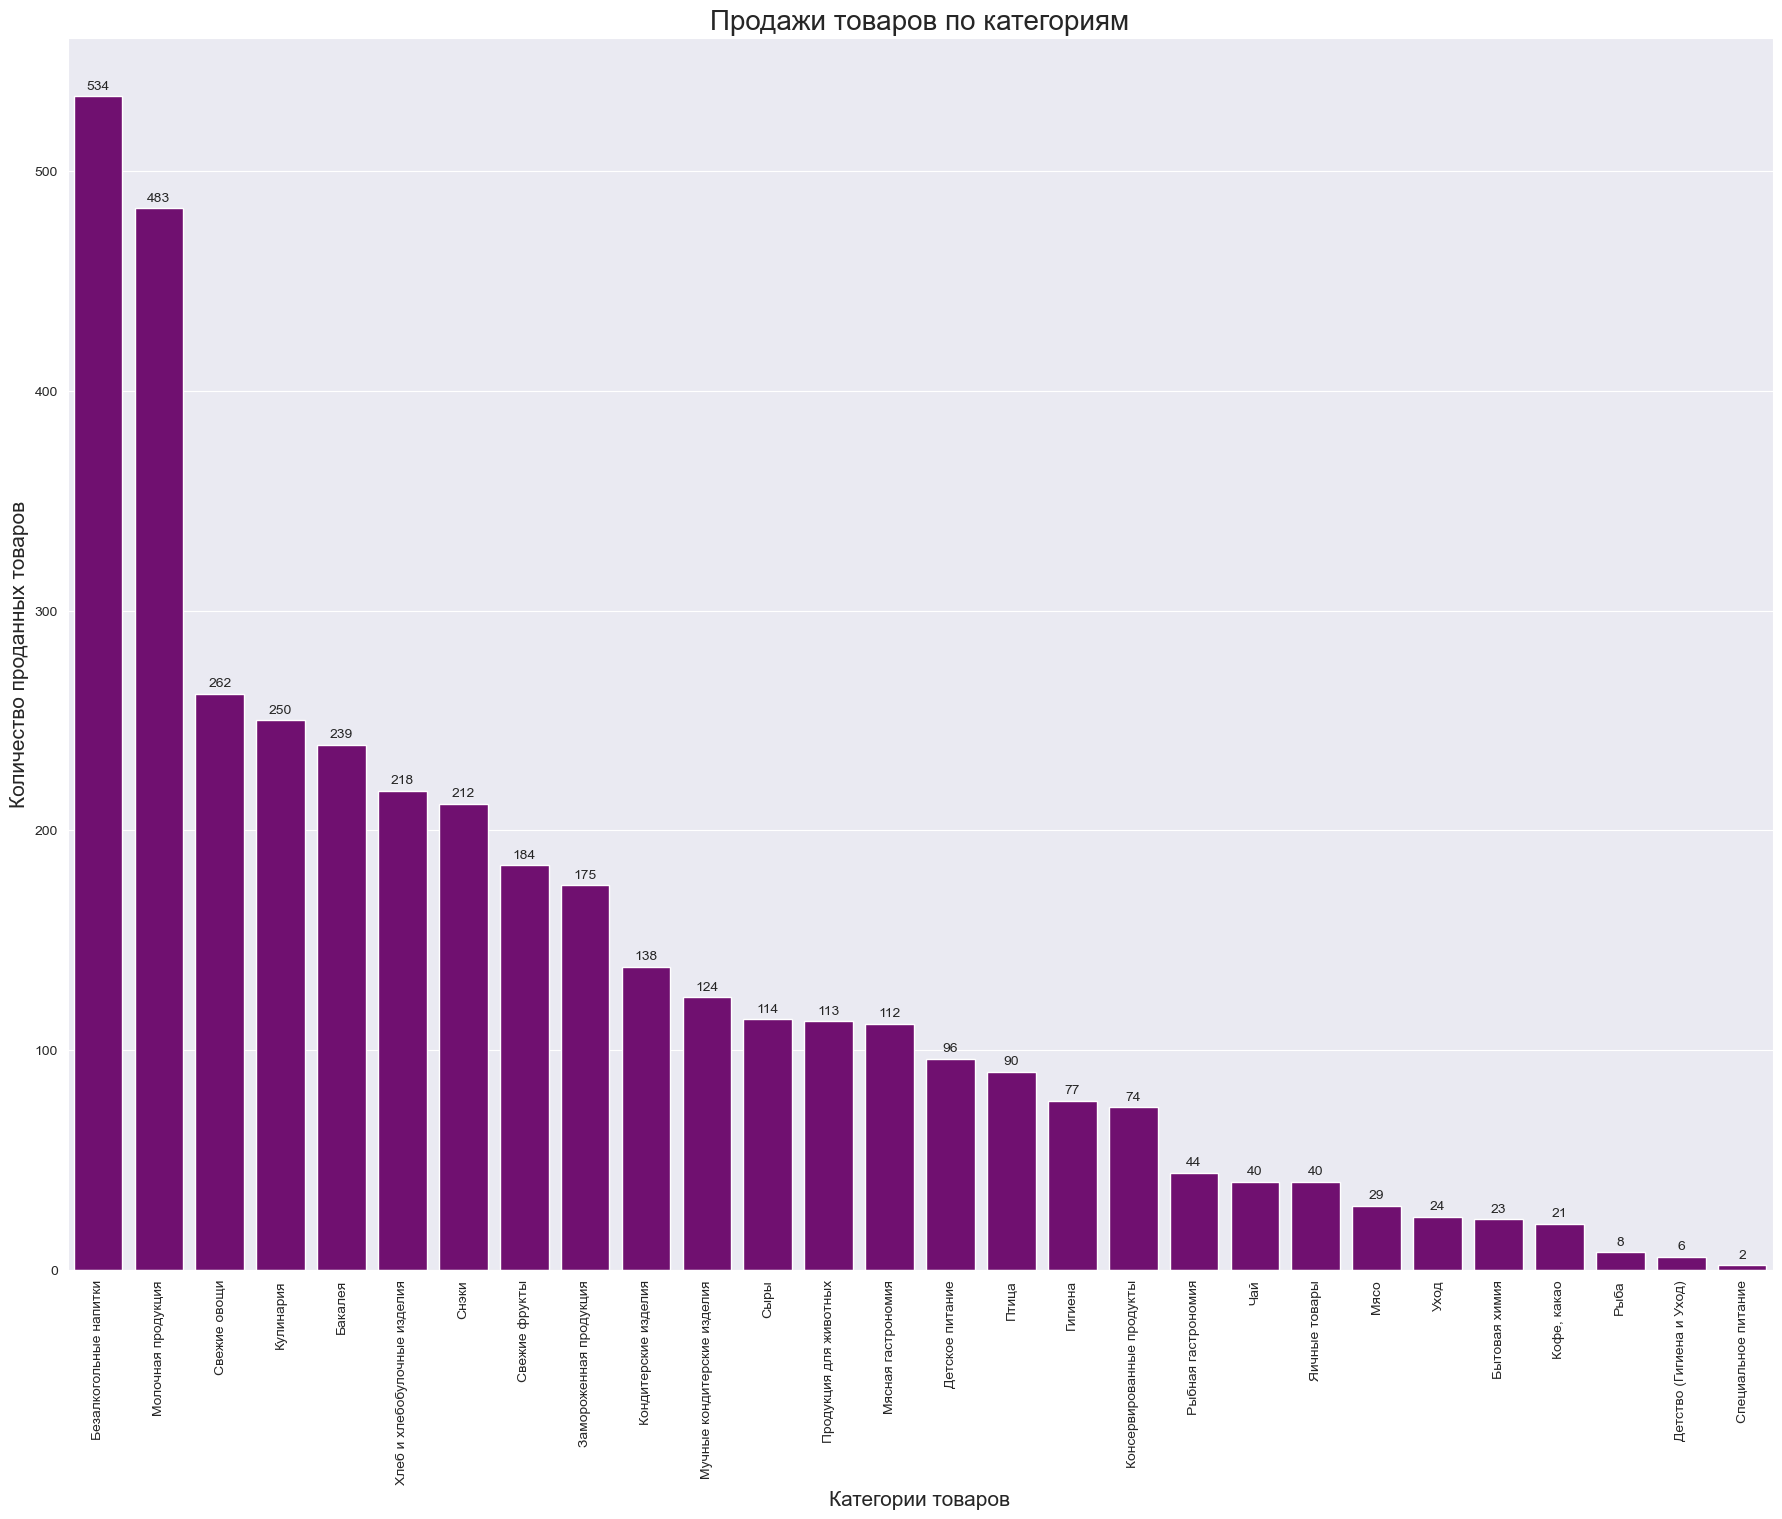

In [11]:
# Строим столбчатую диаграмму (barchart) по категориям товаров:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = [22, 16]
ax = sns.barplot(data = grouped_by_level1, x = 'level1', y = 'quantity', color = '#800080')
ax.set_xlabel('Категории товаров', size = 15)
ax.set_ylabel('Количество проданных товаров', size = 15)
ax.set_title('Продажи товаров по категориям', size = 20)
plt.xticks(rotation = 90)
texts = ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
plt.show()

Вывод: наибольшее количество товаров продано по категриям "Безалкогольные напитки" - 534 позиции, и "Молочная продукция" - 483 позиции.

**2. Распределение продаж по подкатегориям**

In [12]:
# Группируем товары по категориям и подкатегориям и суммируем по количеству проданных товаров:
grouped_df = merged_df.groupby(['level1', 'level2'])['quantity'].sum().reset_index().sort_values('quantity', ascending = False)
grouped_df

,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162
...,...,...,...
39,Кондитерские изделия,Пасты кондитерские,2
68,Мясная гастрономия,Субпродуктовые изделия,2
50,"Кофе, какао","Какао, горячий шоколад",2
17,Бытовая химия,Средства для сантехники,1


In [13]:
grouped_df.to_excel('distribution.xlsx')

**3. Средний чек за 13.01.2022 г.**

In [14]:
# Конвертируем столбец accepted_at в datetime:
orders['accepted_at'] = pd.to_datetime(orders['accepted_at'], dayfirst = True)
orders['accepted_at'].head(2)

0   2022-01-13 16:48:19
1   2022-01-13 16:46:53
Name: accepted_at, dtype: datetime64[ns]

In [15]:
# Фильтруем данные по дате 13.01.2022:
date_filter = orders['accepted_at'].dt.date == pd.to_datetime('2022-01-13').date()
filtered_df = orders[date_filter]
filtered_df.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [16]:
# Считаем общую сумму покупки для каждого заказа:
total_sums = filtered_df.groupby('order_id')['price'].sum()
total_sums.head()

order_id
1517207363     795
1517288545     364
1517293568    1592
1517302077    1964
1517305540     342
Name: price, dtype: int64

In [17]:
# Находим средний чек за 13.01.2022:
average_check = round(total_sums.mean(), 2)
print(f"Сумма среднего чека за 13.01.2022: {average_check} руб.")

Сумма среднего чека за 13.01.2022: 798.04 руб.


**4. Доля сыров, продаваемых по промоакции**

In [18]:
# Фильтруем строки, относящиеся к категории "Сыры":
cheese_products = merged_df.query("level1 == 'Сыры'")
cheese_products.head()

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
116,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517510145,2022-01-13 19:22:00,2,129,129,73
117,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517609703,2022-01-13 08:46:56,1,116,116,73
118,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517675616,2022-01-13 18:23:57,1,129,129,73
119,1105,Сыры,Мягкие сыры,Сыр Моцарелла мини Самокат,1517521855,2022-01-13 19:57:03,1,129,129,73
265,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517668073,2022-01-13 22:43:39,1,199,159,110


In [19]:
# Определяем, какие товары продаются по промоакции (price < regular_price):
promo_products = cheese_products.query("price < regular_price")
promo_products.head()

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
265,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517668073,2022-01-13 22:43:39,1,199,159,110
266,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517559313,2022-01-13 22:12:44,1,199,159,110
267,2134,Сыры,Твердые сычужные сыры,Сыр сливочный Брест-Литовск,1517341326,2022-01-13 20:45:30,1,199,159,110
500,3176,Сыры,Твердые сычужные сыры,Сыр сливочный Natura,1517469469,2022-01-13 15:34:08,1,419,363,262
686,4577,Сыры,Мягкие сыры,Сыр President Чечил,1517575349,2022-01-13 15:58:44,1,227,195,111


In [20]:
# Определяем количество всех товаров в категории "Сыры" и количество товаров, продаваемых по промоакции:
total_cheese_count = len(cheese_products)
promo_cheese_count = len(promo_products)
total_cheese_count, promo_cheese_count

(106, 34)

In [21]:
# Доля товаров, продаваемых по промоакции:
promo_share = promo_cheese_count / total_cheese_count * 100
promo_share

32.075471698113205

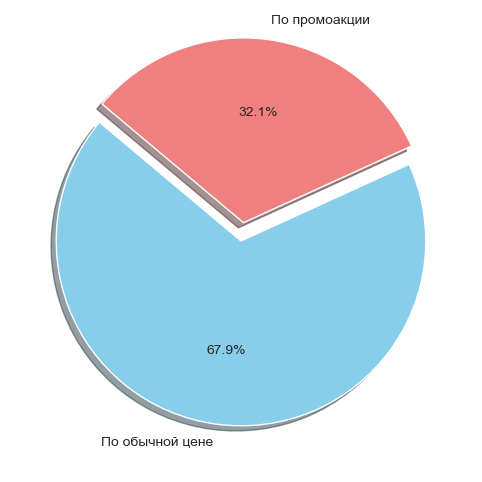

In [22]:
# Построим круговую диаграмму (piechart), отражающую долю сыров, продаваемых по промоакции:
labels = ['По обычной цене', 'По промоакции']
sizes = [100 - promo_share, promo_share]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # Выделяем сегмент с сыром по промоакции

plt.figure(figsize = (8, 6))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.show()

Вывод: доля сыров, продаваемых по промоакции, составляет 32%.

**5. Маржа по категориям товаров**

In [23]:
# Расчет маржи в рублях:
margin_rub = merged_df.groupby('level1')[['quantity', 'cost_price', 'price']].sum().eval('Margin_RUB = price - cost_price').reset_index().sort_values('Margin_RUB', ascending = False)
margin_rub.head()

,level1,quantity,cost_price,price,Margin_RUB
10,Кулинария,250,20497,37428,16931
1,Безалкогольные напитки,534,19057,34220,15163
6,Замороженная продукция,175,12258,23315,11057
13,Мясная гастрономия,112,13421,23360,9939
11,Молочная продукция,483,19576,29502,9926


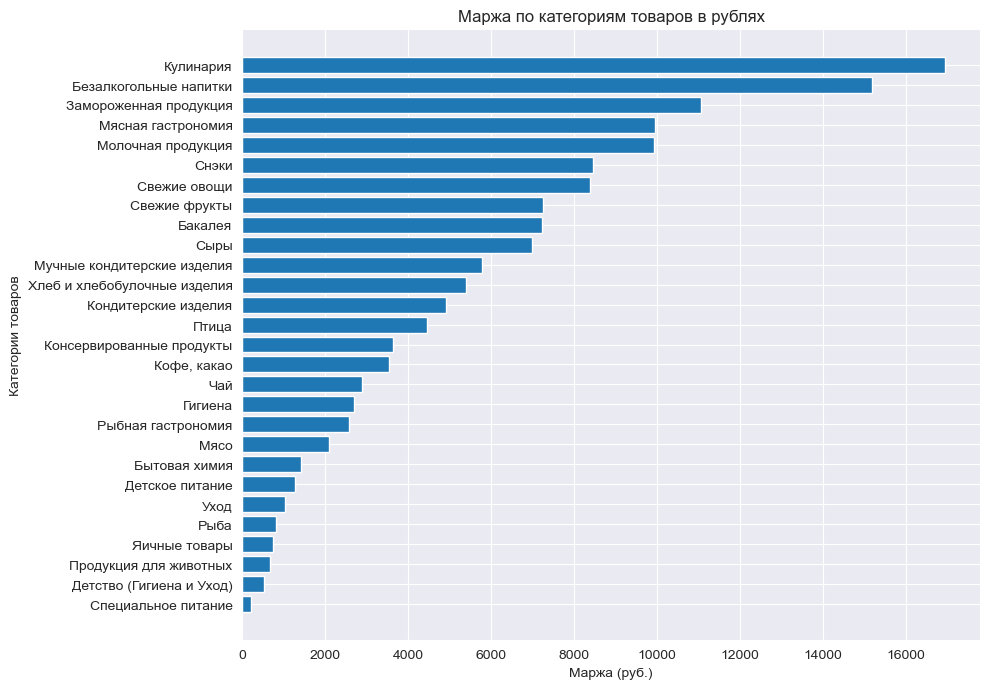

In [24]:
# Визуализация маржи в рублях:
fig, ax1 = plt.subplots(figsize = (10, 7))
ax1.barh(margin_rub['level1'], margin_rub['Margin_RUB'])
ax1.invert_yaxis()  # Инвертирование оси Y
ax1.set_xlabel('Маржа (руб.)')
ax1.set_ylabel('Категории товаров')
ax1.set_title('Маржа по категориям товаров в рублях')
plt.grid(True)
plt.tight_layout()
plt.show()

Вывод: наибольшая маржа в рублях по двум категориям товаров: Кулинария - в районе 17 000 руб., и Безалкогольные напитки - в районе 15 000 руб.

In [25]:
# Расчет маржи в процентах:
margin_percent = margin_rub.assign(Margin_Percent = lambda x: (x['Margin_RUB'] / x['price']) * 100).sort_values('Margin_Percent', ascending = False)
margin_percent.head()

,level1,quantity,cost_price,price,Margin_RUB,Margin_Percent
9,"Кофе, какао",21,3399,6928,3529,50.938222
22,Специальное питание,2,202,410,208,50.731707
6,Замороженная продукция,175,12258,23315,11057,47.424405
26,Чай,40,3429,6312,2883,45.674905
10,Кулинария,250,20497,37428,16931,45.236187


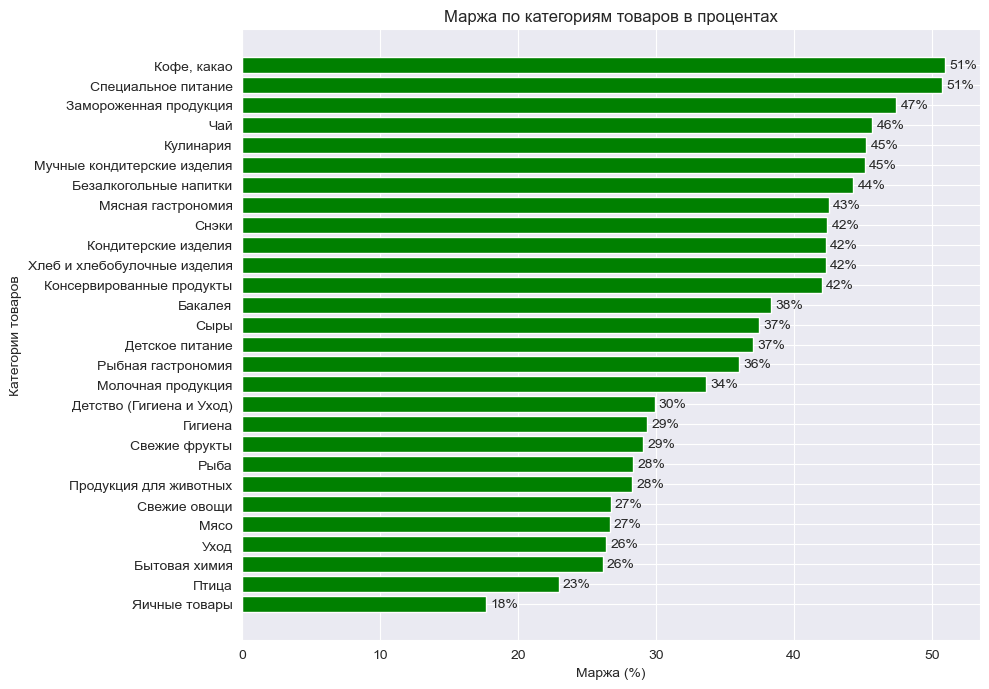

In [26]:
# Визуализация маржи в процентах
fig, ax2 = plt.subplots(figsize=(10, 7))
ax2.barh(margin_percent['level1'], margin_percent['Margin_Percent'], color = 'green')
ax2.invert_yaxis()
ax2.set_xlabel('Маржа (%)')
ax2.set_ylabel('Категории товаров')
ax2.set_title('Маржа по категориям товаров в процентах')
plt.grid(True)
plt.tight_layout()
texts = ax2.bar_label(ax2.containers[0], fmt = '%.0f%%', padding = 3)
plt.show()

Вывод: наибольшая маржа в процентах по двум категориям товаров: "Специальное питание" и "Кофе, какао" - по 51%.

**6. АВС - анализ**

In [27]:
merged_df.head()

,product_id,level1,level2,name,order_id,accepted_at,quantity,regular_price,price,cost_price
0,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517497108,2022-01-13 17:49:12,6,18,18,14
1,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517494748,2022-01-13 20:12:01,2,18,18,14
2,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517368853,2022-01-13 09:34:18,1,18,18,14
3,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517676281,2022-01-13 08:21:53,2,18,18,14
4,23,Бакалея,Сухие блюда быстрого приготовления,Вермишель Роллтон,1517600286,2022-01-13 14:32:24,4,18,18,14


In [28]:
# АВС - анализ продаж по количеству: 
groupped_df = merged_df.groupby('level2').agg({'quantity': 'sum', 'price': 'sum'}).reset_index()  # Группируем категории товаров по количеству и сумме продаж
groupped_df['shere_quantity'] = groupped_df['quantity'] / sum(groupped_df['quantity'])  # Находим долю каждой проданной категории товаров в общем количестве проданных товаров
groupped_df = groupped_df.sort_values('shere_quantity', ascending = False)  # Группируем доли по убыванию
groupped_df['cumsum_quantity'] = groupped_df['shere_quantity'].cumsum()  # Считаем кумулятивную сумму долей
def set_abc(x):
    if x < 0.8: 
        return 'A'
    elif x < 0.95:
        return 'B'
    else:
        return 'C'

groupped_df['abc_quantity'] = groupped_df['cumsum_quantity'].apply(set_abc)  

# АВС - анализ по сумме продаж:
groupped_df['shere_price'] = groupped_df['price'] / sum(groupped_df['price'])  # Находим долю каждой категории от общей суммы проданных товаров 
groupped_df = groupped_df.sort_values('shere_price', ascending=False)   # Группируем доли по убыванию
groupped_df['cumsum_price'] = groupped_df['shere_price'].cumsum()      # Считаем кумулятивную сумму
groupped_df['abc_price'] = groupped_df['cumsum_price'].apply(set_abc) 
groupped_df['ABC_join'] = groupped_df.filter(like='abc').apply(' '.join, axis=1)
groupped_df

,level2,quantity,price,shere_quantity,cumsum_quantity,abc_quantity,shere_price,cumsum_price,abc_price,ABC_join
10,Готовые блюда,248,36944,0.066452,0.133976,A,0.095100,0.095100,A,A A
50,Мясо птицы охлажденное,90,19402,0.024116,0.534030,A,0.049944,0.145044,A,A A
51,Напитки,252,18320,0.067524,0.067524,A,0.047159,0.192202,A,A A
85,"Тепличные овощи, грибы",105,17782,0.028135,0.482047,A,0.045774,0.237976,A,A A
94,"Цитрусовые, семечковые и прочие плоды",108,16038,0.028939,0.425509,A,0.041284,0.279260,A,A A
...,...,...,...,...,...,...,...,...,...,...
35,Кофе для капсульных машин,4,235,0.001072,0.983655,C,0.000605,0.998494,C,C C
91,Уход за одеждой и обувью,3,192,0.000804,0.988746,C,0.000494,0.998988,C,C C
57,Первая помощь,2,168,0.000536,0.996785,C,0.000432,0.999421,C,C C
87,Товары для собак,37,150,0.009914,0.791265,A,0.000386,0.999807,C,A C


In [29]:
ABC_df = groupped_df[['level2', 'ABC_join']]
ABC_df

,level2,ABC_join
10,Готовые блюда,A A
50,Мясо птицы охлажденное,A A
51,Напитки,A A
85,"Тепличные овощи, грибы",A A
94,"Цитрусовые, семечковые и прочие плоды",A A
...,...,...
35,Кофе для капсульных машин,C C
91,Уход за одеждой и обувью,C C
57,Первая помощь,C C
87,Товары для собак,A C


In [30]:
ABC_df.to_excel('ABC_analyzis.xlsx')